In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: STM
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


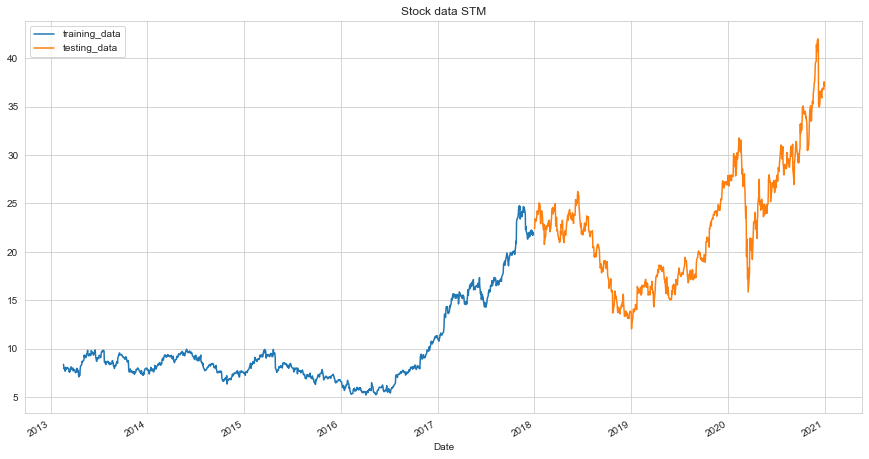

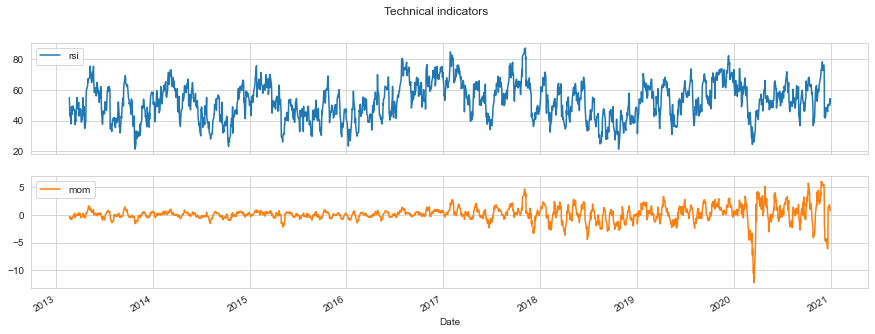

In [2]:
stock_name = 'stm'.upper()
industry = 'Technology'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1543.98, duration: 0:00:00.437245
episode: 2/2000, episode end value: 1602.07, duration: 0:00:00.413298
episode: 3/2000, episode end value: 1571.70, duration: 0:00:00.438836
episode: 4/2000, episode end value: 1561.89, duration: 0:00:00.431272
episode: 5/2000, episode end value: 1540.38, duration: 0:00:00.330005
episode: 6/2000, episode end value: 1633.43, duration: 0:00:00.363058
episode: 7/2000, episode end value: 1558.06, duration: 0:00:00.437983
episode: 8/2000, episode end value: 1641.03, duration: 0:00:00.418689
episode: 9/2000, episode end value: 1636.32, duration: 0:00:00.384159
episode: 10/2000, episode end value: 1675.64, duration: 0:00:00.412974
episode: 11/2000, episode end value: 1616.14, duration: 0:00:00.303174
episode: 12/2000, episode end value: 1665.48, duration: 0:00:00.425127
episode: 13/2000, episode end value: 1744.44, duration: 0:00:00.374914
episode: 14/2000, episode end value: 1604.24, duration: 0:00:00.372746
episode: 15/200

episode: 117/2000, episode end value: 1532.02, duration: 0:00:00.384197
episode: 118/2000, episode end value: 1529.04, duration: 0:00:00.407996
episode: 119/2000, episode end value: 1531.45, duration: 0:00:00.428357
episode: 120/2000, episode end value: 1560.78, duration: 0:00:00.415961
episode: 121/2000, episode end value: 1524.73, duration: 0:00:00.380099
episode: 122/2000, episode end value: 1532.23, duration: 0:00:00.428248
episode: 123/2000, episode end value: 1534.25, duration: 0:00:00.473468
episode: 124/2000, episode end value: 1541.46, duration: 0:00:00.438813
episode: 125/2000, episode end value: 1532.86, duration: 0:00:00.378212
episode: 126/2000, episode end value: 1535.41, duration: 0:00:00.432709
episode: 127/2000, episode end value: 1879.45, duration: 0:00:00.327398
episode: 128/2000, episode end value: 1516.38, duration: 0:00:00.274356
episode: 129/2000, episode end value: 1683.70, duration: 0:00:00.366945
episode: 130/2000, episode end value: 1552.42, duration: 0:00:00

episode: 231/2000, episode end value: 1560.77, duration: 0:00:00.368027
episode: 232/2000, episode end value: 1580.94, duration: 0:00:00.383878
episode: 233/2000, episode end value: 1911.93, duration: 0:00:00.282378
episode: 234/2000, episode end value: 1543.20, duration: 0:00:00.401732
episode: 235/2000, episode end value: 1667.08, duration: 0:00:00.454496
episode: 236/2000, episode end value: 1530.09, duration: 0:00:00.325377
episode: 237/2000, episode end value: 1522.79, duration: 0:00:00.459109
episode: 238/2000, episode end value: 1522.54, duration: 0:00:00.524473
episode: 239/2000, episode end value: 1687.28, duration: 0:00:00.434645
episode: 240/2000, episode end value: 1618.47, duration: 0:00:00.432913
episode: 241/2000, episode end value: 1634.90, duration: 0:00:00.335557
episode: 242/2000, episode end value: 1613.45, duration: 0:00:00.363753
episode: 243/2000, episode end value: 1526.41, duration: 0:00:00.365408
episode: 244/2000, episode end value: 1530.86, duration: 0:00:00

episode: 345/2000, episode end value: 1797.77, duration: 0:00:00.305282
episode: 346/2000, episode end value: 1526.42, duration: 0:00:00.344596
episode: 347/2000, episode end value: 1535.29, duration: 0:00:00.373839
episode: 348/2000, episode end value: 1680.21, duration: 0:00:00.324829
episode: 349/2000, episode end value: 1552.68, duration: 0:00:00.367219
episode: 350/2000, episode end value: 1888.23, duration: 0:00:00.316286
episode: 351/2000, episode end value: 1520.03, duration: 0:00:00.337762
episode: 352/2000, episode end value: 1683.13, duration: 0:00:00.291141
episode: 353/2000, episode end value: 1531.81, duration: 0:00:00.314779
episode: 354/2000, episode end value: 1673.77, duration: 0:00:00.419483
episode: 355/2000, episode end value: 1516.19, duration: 0:00:00.360762
episode: 356/2000, episode end value: 1820.04, duration: 0:00:00.303341
episode: 357/2000, episode end value: 1566.95, duration: 0:00:00.387365
episode: 358/2000, episode end value: 1538.62, duration: 0:00:00

episode: 459/2000, episode end value: 1529.08, duration: 0:00:00.366313
episode: 460/2000, episode end value: 1697.16, duration: 0:00:00.289634
episode: 461/2000, episode end value: 1539.31, duration: 0:00:00.374857
episode: 462/2000, episode end value: 1640.14, duration: 0:00:00.314116
episode: 463/2000, episode end value: 1914.42, duration: 0:00:00.328323
episode: 464/2000, episode end value: 1540.51, duration: 0:00:00.341677
episode: 465/2000, episode end value: 2056.27, duration: 0:00:00.448917
episode: 466/2000, episode end value: 1517.96, duration: 0:00:00.343746
episode: 467/2000, episode end value: 1519.58, duration: 0:00:00.325162
episode: 468/2000, episode end value: 1706.90, duration: 0:00:00.366623
episode: 469/2000, episode end value: 1529.60, duration: 0:00:00.412665
episode: 470/2000, episode end value: 1525.68, duration: 0:00:00.469659
episode: 471/2000, episode end value: 1520.86, duration: 0:00:00.396692
episode: 472/2000, episode end value: 1530.84, duration: 0:00:00

episode: 573/2000, episode end value: 1795.83, duration: 0:00:00.318071
episode: 574/2000, episode end value: 1500.00, duration: 0:00:00.352080
episode: 575/2000, episode end value: 1842.90, duration: 0:00:00.440098
episode: 576/2000, episode end value: 1506.78, duration: 0:00:00.370084
episode: 577/2000, episode end value: 1539.98, duration: 0:00:00.323073
episode: 578/2000, episode end value: 1636.33, duration: 0:00:00.367083
episode: 579/2000, episode end value: 1533.48, duration: 0:00:00.484111
episode: 580/2000, episode end value: 1564.23, duration: 0:00:00.473107
episode: 581/2000, episode end value: 1532.78, duration: 0:00:00.440102
episode: 582/2000, episode end value: 1815.85, duration: 0:00:00.378083
episode: 583/2000, episode end value: 1542.56, duration: 0:00:00.300471
episode: 584/2000, episode end value: 1516.03, duration: 0:00:00.553907
episode: 585/2000, episode end value: 1539.95, duration: 0:00:01.113391
episode: 586/2000, episode end value: 1535.74, duration: 0:00:00

episode: 687/2000, episode end value: 1861.16, duration: 0:00:00.392388
episode: 688/2000, episode end value: 1533.98, duration: 0:00:00.433769
episode: 689/2000, episode end value: 1614.70, duration: 0:00:00.327398
episode: 690/2000, episode end value: 1604.72, duration: 0:00:00.345279
episode: 691/2000, episode end value: 1703.41, duration: 0:00:00.321406
episode: 692/2000, episode end value: 1578.53, duration: 0:00:00.323013
episode: 693/2000, episode end value: 1740.69, duration: 0:00:00.313483
episode: 694/2000, episode end value: 1587.75, duration: 0:00:00.379817
episode: 695/2000, episode end value: 1520.38, duration: 0:00:00.402549
episode: 696/2000, episode end value: 1596.60, duration: 0:00:00.351380
episode: 697/2000, episode end value: 1593.52, duration: 0:00:00.342587
episode: 698/2000, episode end value: 1659.34, duration: 0:00:00.273148
episode: 699/2000, episode end value: 1519.56, duration: 0:00:00.407710
episode: 700/2000, episode end value: 1516.69, duration: 0:00:00

episode: 801/2000, episode end value: 1866.40, duration: 0:00:00.339833
episode: 802/2000, episode end value: 1555.56, duration: 0:00:00.340005
episode: 803/2000, episode end value: 1506.11, duration: 0:00:00.406627
episode: 804/2000, episode end value: 1655.52, duration: 0:00:00.321306
episode: 805/2000, episode end value: 1516.83, duration: 0:00:00.333226
episode: 806/2000, episode end value: 1584.12, duration: 0:00:00.347714
episode: 807/2000, episode end value: 1609.36, duration: 0:00:00.313717
episode: 808/2000, episode end value: 1538.96, duration: 0:00:00.373298
episode: 809/2000, episode end value: 1519.27, duration: 0:00:00.361398
episode: 810/2000, episode end value: 1653.70, duration: 0:00:00.367364
episode: 811/2000, episode end value: 1507.39, duration: 0:00:00.317793
episode: 812/2000, episode end value: 1520.35, duration: 0:00:00.369257
episode: 813/2000, episode end value: 1538.14, duration: 0:00:00.389064
episode: 814/2000, episode end value: 1986.14, duration: 0:00:00

episode: 915/2000, episode end value: 1712.41, duration: 0:00:00.405932
episode: 916/2000, episode end value: 1667.80, duration: 0:00:00.326426
episode: 917/2000, episode end value: 1647.98, duration: 0:00:00.297573
episode: 918/2000, episode end value: 1719.68, duration: 0:00:00.344308
episode: 919/2000, episode end value: 1508.20, duration: 0:00:00.375692
episode: 920/2000, episode end value: 1524.78, duration: 0:00:00.391917
episode: 921/2000, episode end value: 1521.67, duration: 0:00:00.365831
episode: 922/2000, episode end value: 1520.20, duration: 0:00:00.481728
episode: 923/2000, episode end value: 1789.82, duration: 0:00:00.345081
episode: 924/2000, episode end value: 1607.58, duration: 0:00:00.371962
episode: 925/2000, episode end value: 1561.64, duration: 0:00:00.287392
episode: 926/2000, episode end value: 1635.21, duration: 0:00:00.338972
episode: 927/2000, episode end value: 1523.51, duration: 0:00:00.405555
episode: 928/2000, episode end value: 1734.97, duration: 0:00:00

episode: 1029/2000, episode end value: 1608.57, duration: 0:00:00.396231
episode: 1030/2000, episode end value: 1557.19, duration: 0:00:00.373800
episode: 1031/2000, episode end value: 1880.09, duration: 0:00:00.366989
episode: 1032/2000, episode end value: 1857.56, duration: 0:00:00.369548
episode: 1033/2000, episode end value: 1618.22, duration: 0:00:00.377115
episode: 1034/2000, episode end value: 1518.55, duration: 0:00:00.366803
episode: 1035/2000, episode end value: 1526.09, duration: 0:00:00.426955
episode: 1036/2000, episode end value: 1521.77, duration: 0:00:00.352934
episode: 1037/2000, episode end value: 1542.46, duration: 0:00:00.478526
episode: 1038/2000, episode end value: 1845.10, duration: 0:00:00.325071
episode: 1039/2000, episode end value: 1550.10, duration: 0:00:00.404562
episode: 1040/2000, episode end value: 1527.00, duration: 0:00:00.423477
episode: 1041/2000, episode end value: 1648.23, duration: 0:00:00.327402
episode: 1042/2000, episode end value: 1853.14, dur

episode: 1142/2000, episode end value: 1815.92, duration: 0:00:00.322531
episode: 1143/2000, episode end value: 1996.86, duration: 0:00:00.267186
episode: 1144/2000, episode end value: 1791.90, duration: 0:00:00.277935
episode: 1145/2000, episode end value: 1868.99, duration: 0:00:00.328712
episode: 1146/2000, episode end value: 1518.54, duration: 0:00:00.412838
episode: 1147/2000, episode end value: 1837.88, duration: 0:00:00.305066
episode: 1148/2000, episode end value: 1527.60, duration: 0:00:00.349100
episode: 1149/2000, episode end value: 1662.70, duration: 0:00:00.362056
episode: 1150/2000, episode end value: 1796.98, duration: 0:00:00.300549
episode: 1151/2000, episode end value: 1505.24, duration: 0:00:00.299554
episode: 1152/2000, episode end value: 1595.10, duration: 0:00:00.384466
episode: 1153/2000, episode end value: 1794.79, duration: 0:00:00.271172
episode: 1154/2000, episode end value: 1778.58, duration: 0:00:00.326762
episode: 1155/2000, episode end value: 1784.26, dur

episode: 1255/2000, episode end value: 1506.41, duration: 0:00:00.347488
episode: 1256/2000, episode end value: 1891.11, duration: 0:00:00.351333
episode: 1257/2000, episode end value: 1703.09, duration: 0:00:00.392137
episode: 1258/2000, episode end value: 1586.81, duration: 0:00:00.337751
episode: 1259/2000, episode end value: 1537.57, duration: 0:00:00.308010
episode: 1260/2000, episode end value: 1526.59, duration: 0:00:00.333053
episode: 1261/2000, episode end value: 1882.30, duration: 0:00:00.285805
episode: 1262/2000, episode end value: 1907.64, duration: 0:00:00.323715
episode: 1263/2000, episode end value: 1597.03, duration: 0:00:00.377681
episode: 1264/2000, episode end value: 1685.93, duration: 0:00:00.267416
episode: 1265/2000, episode end value: 1649.33, duration: 0:00:00.337411
episode: 1266/2000, episode end value: 1660.98, duration: 0:00:00.319446
episode: 1267/2000, episode end value: 1635.63, duration: 0:00:00.294946
episode: 1268/2000, episode end value: 1514.79, dur

episode: 1368/2000, episode end value: 1548.52, duration: 0:00:00.384662
episode: 1369/2000, episode end value: 1654.16, duration: 0:00:00.300174
episode: 1370/2000, episode end value: 1572.27, duration: 0:00:00.374831
episode: 1371/2000, episode end value: 1527.95, duration: 0:00:00.386296
episode: 1372/2000, episode end value: 1518.60, duration: 0:00:00.387514
episode: 1373/2000, episode end value: 1518.93, duration: 0:00:00.310539
episode: 1374/2000, episode end value: 1578.84, duration: 0:00:00.461152
episode: 1375/2000, episode end value: 1570.12, duration: 0:00:00.342097
episode: 1376/2000, episode end value: 1583.66, duration: 0:00:00.363589
episode: 1377/2000, episode end value: 1636.98, duration: 0:00:00.335896
episode: 1378/2000, episode end value: 1537.81, duration: 0:00:00.352513
episode: 1379/2000, episode end value: 1811.40, duration: 0:00:00.419504
episode: 1380/2000, episode end value: 1558.78, duration: 0:00:00.350152
episode: 1381/2000, episode end value: 1606.07, dur

episode: 1481/2000, episode end value: 1743.08, duration: 0:00:00.407920
episode: 1482/2000, episode end value: 1845.42, duration: 0:00:00.257297
episode: 1483/2000, episode end value: 1840.49, duration: 0:00:00.279742
episode: 1484/2000, episode end value: 1788.05, duration: 0:00:00.268511
episode: 1485/2000, episode end value: 1505.76, duration: 0:00:00.356024
episode: 1486/2000, episode end value: 1558.69, duration: 0:00:00.319387
episode: 1487/2000, episode end value: 1681.37, duration: 0:00:00.436480
episode: 1488/2000, episode end value: 1741.60, duration: 0:00:00.316546
episode: 1489/2000, episode end value: 1662.42, duration: 0:00:00.364302
episode: 1490/2000, episode end value: 1526.40, duration: 0:00:00.315460
episode: 1491/2000, episode end value: 1548.63, duration: 0:00:00.311457
episode: 1492/2000, episode end value: 1826.99, duration: 0:00:00.271499
episode: 1493/2000, episode end value: 1635.73, duration: 0:00:00.330062
episode: 1494/2000, episode end value: 1802.45, dur

episode: 1594/2000, episode end value: 1593.25, duration: 0:00:00.411136
episode: 1595/2000, episode end value: 1525.97, duration: 0:00:00.330876
episode: 1596/2000, episode end value: 1518.13, duration: 0:00:00.434201
episode: 1597/2000, episode end value: 1527.22, duration: 0:00:00.352312
episode: 1598/2000, episode end value: 1520.68, duration: 0:00:00.371883
episode: 1599/2000, episode end value: 1539.15, duration: 0:00:00.470617
episode: 1600/2000, episode end value: 1520.61, duration: 0:00:00.434065
episode: 1601/2000, episode end value: 1517.88, duration: 0:00:00.450807
episode: 1602/2000, episode end value: 1650.31, duration: 0:00:00.437449
episode: 1603/2000, episode end value: 1539.21, duration: 0:00:00.451402
episode: 1604/2000, episode end value: 1878.76, duration: 0:00:00.351958
episode: 1605/2000, episode end value: 1529.29, duration: 0:00:00.386332
episode: 1606/2000, episode end value: 1634.13, duration: 0:00:00.447099
episode: 1607/2000, episode end value: 1902.76, dur

episode: 1707/2000, episode end value: 1787.97, duration: 0:00:00.280020
episode: 1708/2000, episode end value: 1638.62, duration: 0:00:00.371905
episode: 1709/2000, episode end value: 1845.31, duration: 0:00:00.281970
episode: 1710/2000, episode end value: 1876.37, duration: 0:00:00.307272
episode: 1711/2000, episode end value: 1587.74, duration: 0:00:00.306382
episode: 1712/2000, episode end value: 1586.33, duration: 0:00:00.422801
episode: 1713/2000, episode end value: 1894.94, duration: 0:00:00.320837
episode: 1714/2000, episode end value: 1628.92, duration: 0:00:00.286893
episode: 1715/2000, episode end value: 1564.03, duration: 0:00:00.315159
episode: 1716/2000, episode end value: 1523.92, duration: 0:00:00.305091
episode: 1717/2000, episode end value: 1548.00, duration: 0:00:00.357000
episode: 1718/2000, episode end value: 1548.90, duration: 0:00:00.334280
episode: 1719/2000, episode end value: 1516.52, duration: 0:00:00.414616
episode: 1720/2000, episode end value: 1819.94, dur

episode: 1820/2000, episode end value: 1505.56, duration: 0:00:00.369475
episode: 1821/2000, episode end value: 1528.49, duration: 0:00:00.348597
episode: 1822/2000, episode end value: 1530.37, duration: 0:00:00.442219
episode: 1823/2000, episode end value: 1601.49, duration: 0:00:00.475304
episode: 1824/2000, episode end value: 1857.35, duration: 0:00:00.279051
episode: 1825/2000, episode end value: 1570.07, duration: 0:00:00.327352
episode: 1826/2000, episode end value: 1531.91, duration: 0:00:00.292897
episode: 1827/2000, episode end value: 1520.90, duration: 0:00:00.375443
episode: 1828/2000, episode end value: 1526.43, duration: 0:00:00.467630
episode: 1829/2000, episode end value: 1517.16, duration: 0:00:00.442378
episode: 1830/2000, episode end value: 1553.12, duration: 0:00:00.492601
episode: 1831/2000, episode end value: 1646.44, duration: 0:00:00.408951
episode: 1832/2000, episode end value: 1576.94, duration: 0:00:00.301261
episode: 1833/2000, episode end value: 1583.81, dur

episode: 1933/2000, episode end value: 1568.31, duration: 0:00:00.384806
episode: 1934/2000, episode end value: 1538.12, duration: 0:00:00.407275
episode: 1935/2000, episode end value: 1715.10, duration: 0:00:00.344487
episode: 1936/2000, episode end value: 1517.82, duration: 0:00:00.423958
episode: 1937/2000, episode end value: 1521.50, duration: 0:00:00.365138
episode: 1938/2000, episode end value: 1670.29, duration: 0:00:00.384500
episode: 1939/2000, episode end value: 1788.41, duration: 0:00:00.332721
episode: 1940/2000, episode end value: 1542.68, duration: 0:00:00.383142
episode: 1941/2000, episode end value: 1778.73, duration: 0:00:00.314501
episode: 1942/2000, episode end value: 1647.56, duration: 0:00:00.390466
episode: 1943/2000, episode end value: 1822.79, duration: 0:00:00.321745
episode: 1944/2000, episode end value: 1530.79, duration: 0:00:00.307316
episode: 1945/2000, episode end value: 1565.23, duration: 0:00:00.405469
episode: 1946/2000, episode end value: 1635.98, dur

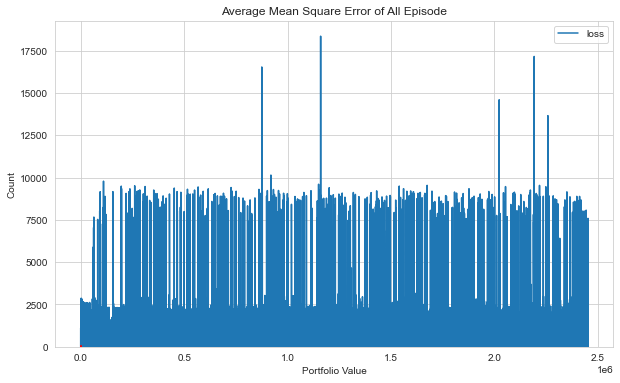

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

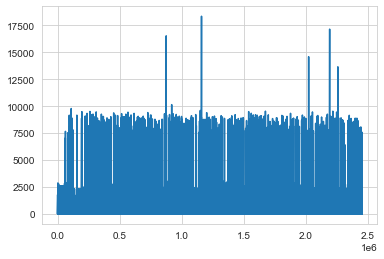

In [5]:
plt.plot(agent.model.losses)

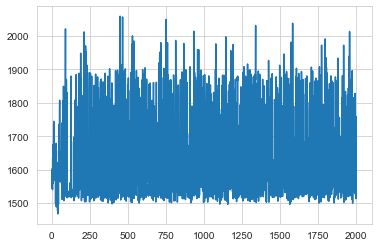

In [6]:
plt.plot(portfolio_value)

episode end value: 1403.39, duration: 0:00:00.134679
Sell: 411 times, Buy: 337 times


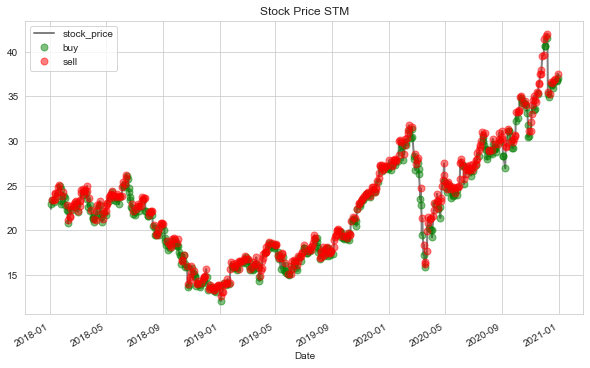

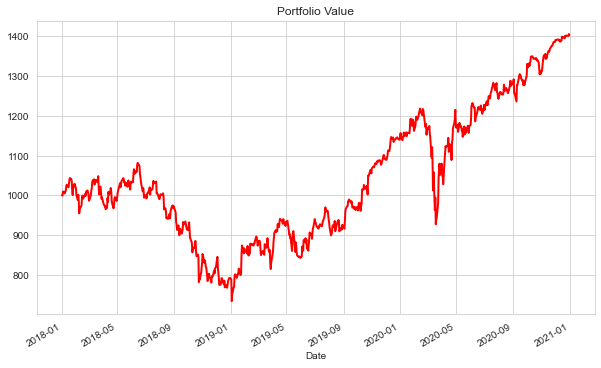

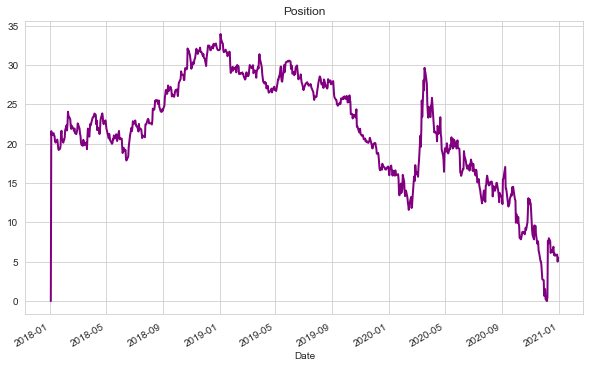

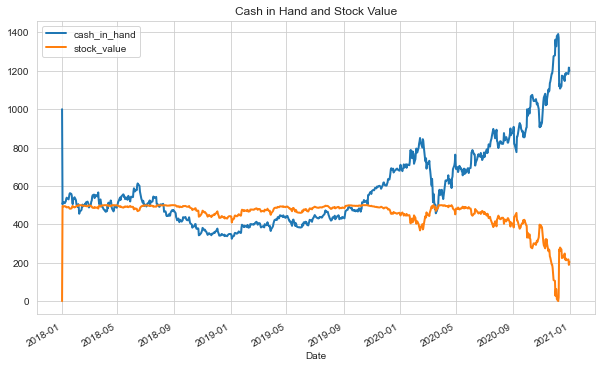

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: STM
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 11.96 %
Volatility: 0.2250
shape ratio: 0.4825
Maximun drawdown: -32.12 %
Calmar ratio: 0.3723
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 18.34 %
Volatility (benchmark): 0.4833
shape ratio: 0.3566
Maximun drawdown: -54.00 %
Calmar ratio (benchmark): 0.3396


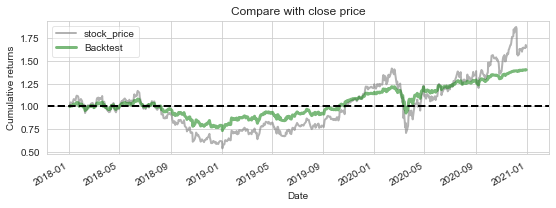

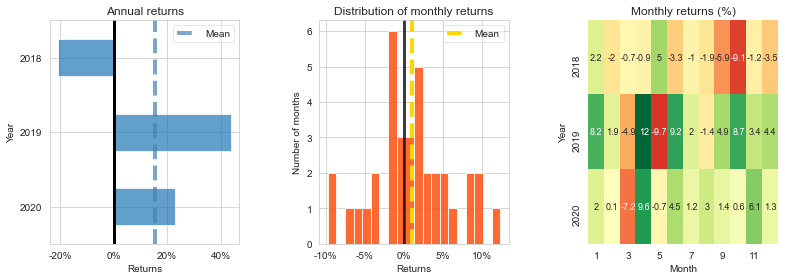

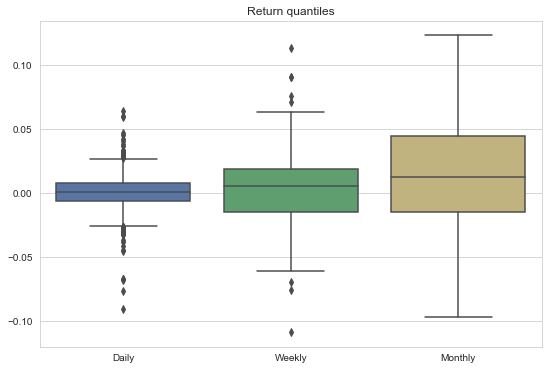

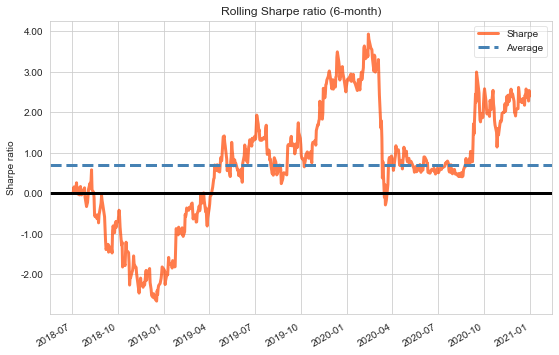

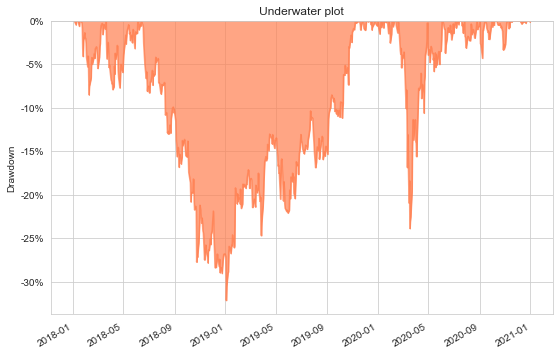

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')